In [0]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
# here we will impor the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline


from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split,GridSearchCV  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report

In [0]:
from sklearn.model_selection import GridSearchCV# for tuning parameter
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [0]:
dataset = pd.read_csv('data.csv')
dataset.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [0]:
print('This dataset contains ',dataset.shape[0],'rows')
print('This dataset contains ',dataset.shape[1],'columns')

This dataset contains  569 rows
This dataset contains  33 columns


In [0]:
dataset.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of the Dataset")

In [0]:
# Setting 'id_number' as our index
dataset.set_index(['id'], inplace = True)

In [0]:
# Converted to binary the target to help later with  Modelling and Plots 

dataset['diagnosis'] = dataset['diagnosis'].map({'M':1, 'B':0})

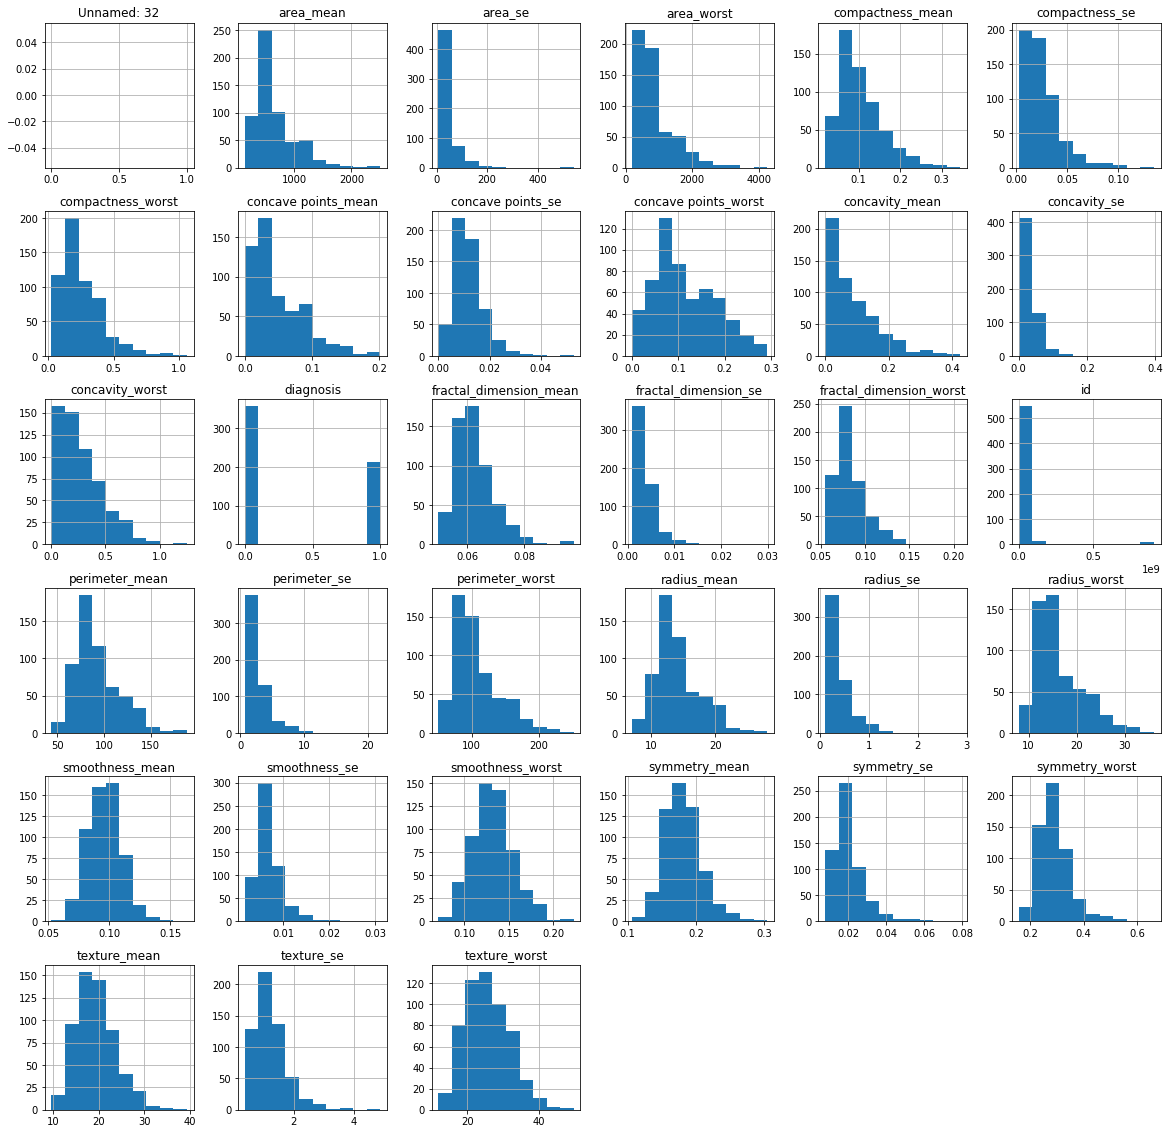

In [0]:
# Plot histograms for each variable

dataset.hist(figsize = (20, 20))
plt.show()

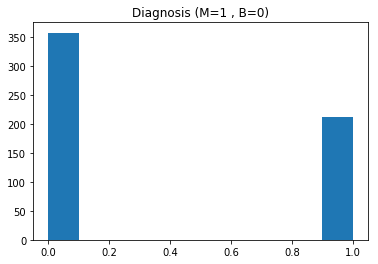

In [0]:
dataset.describe()
plt.hist(dataset['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

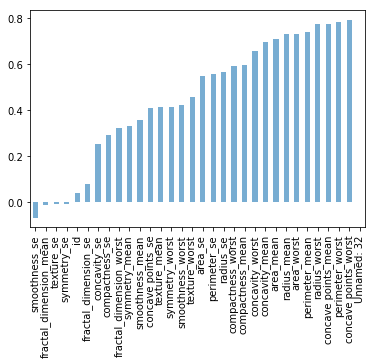

In [0]:
# Observe the Correlation to the diagnosis

tst = dataset.corr()['diagnosis'].copy()
tst = tst.drop('diagnosis')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha=0.6)

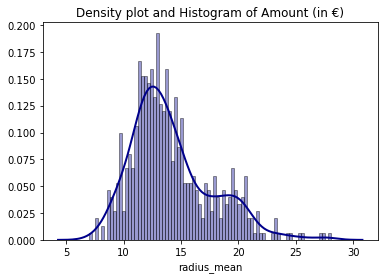

In [0]:
# Radius.Mean Visualization
# Density Plot and Histogram of radius.mean variable of the dataset


sns.distplot(dataset.radius_mean, 
             bins=80, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title('Density plot and Histogram of Amount (in €)')
plt.show()

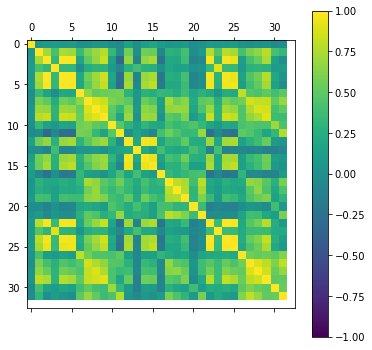

In [0]:
# Pandas Scatter Matrix

from pandas.plotting import scatter_matrix

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

In [0]:

# Normalizing the dataset

x = (dataset -np.min(dataset))/(np.max(dataset)-np.min(dataset)).values

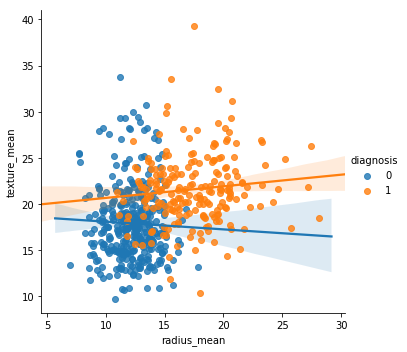

In [0]:
sns.lmplot(x = 'radius_mean', y= 'texture_mean', hue = 'diagnosis',data = dataset)

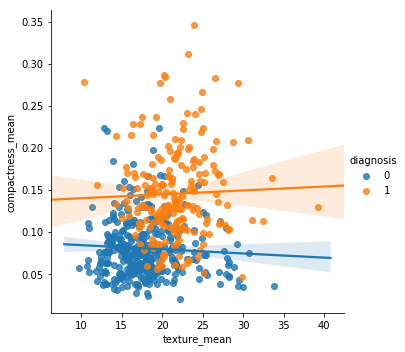

In [0]:
sns.lmplot(x='texture_mean', y = 'compactness_mean', data = dataset, hue = 'diagnosis')

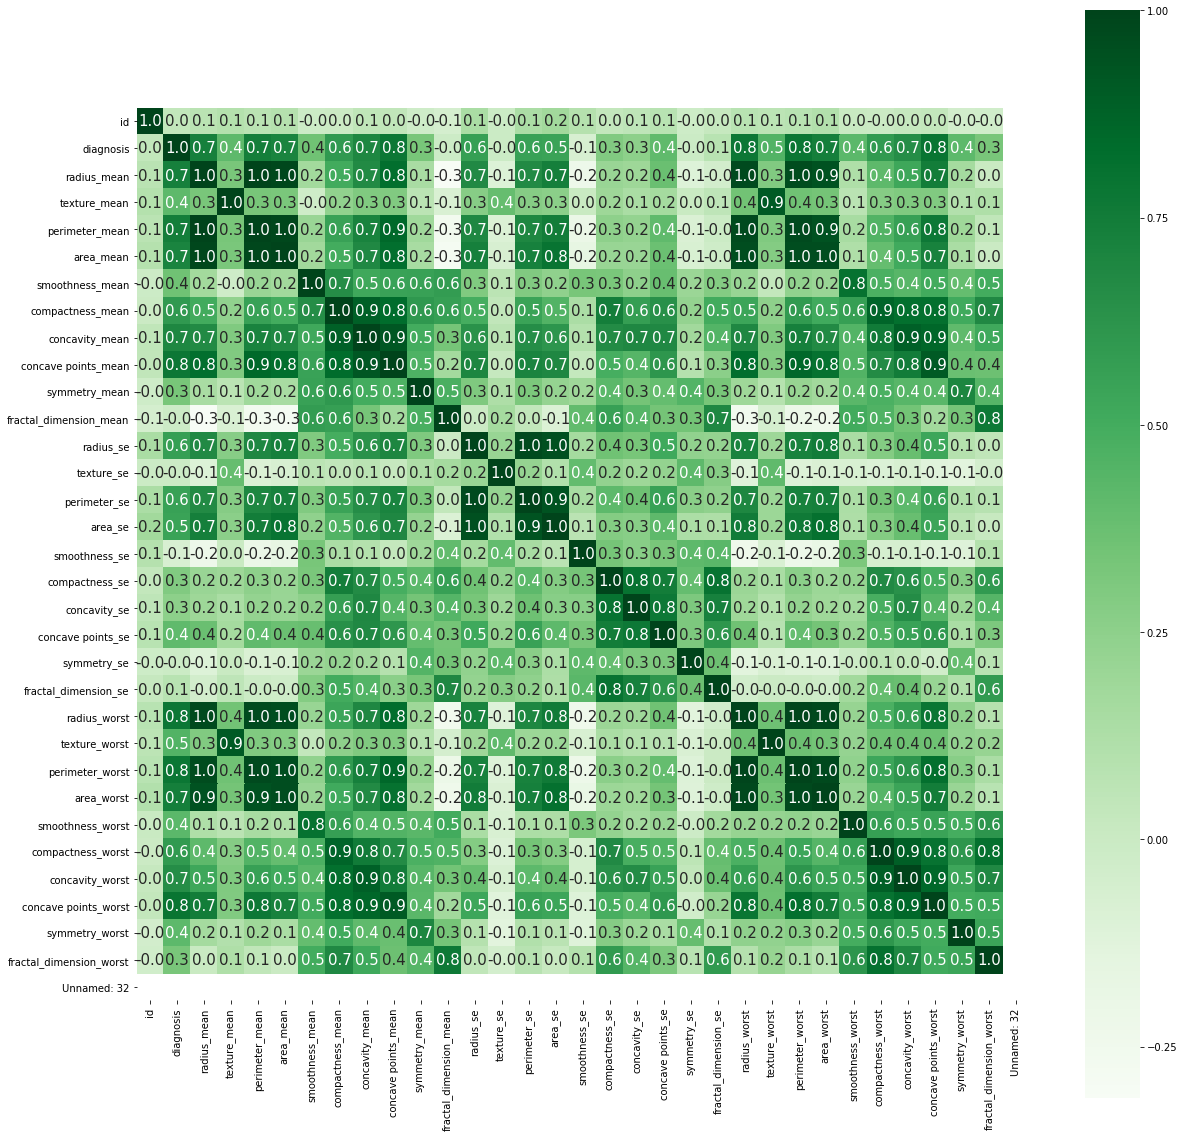

In [0]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

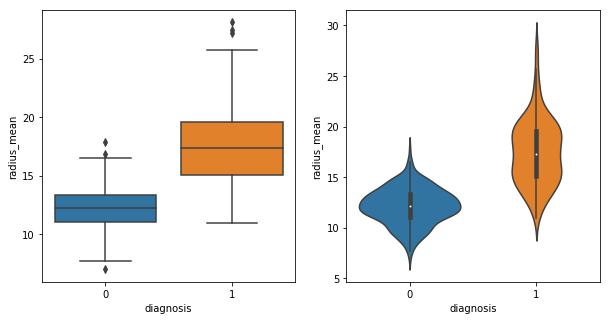

In [0]:
# Plotting correlation between diagnosis and radius

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="radius_mean", data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis", y="radius_mean", data=dataset)
plt.show()

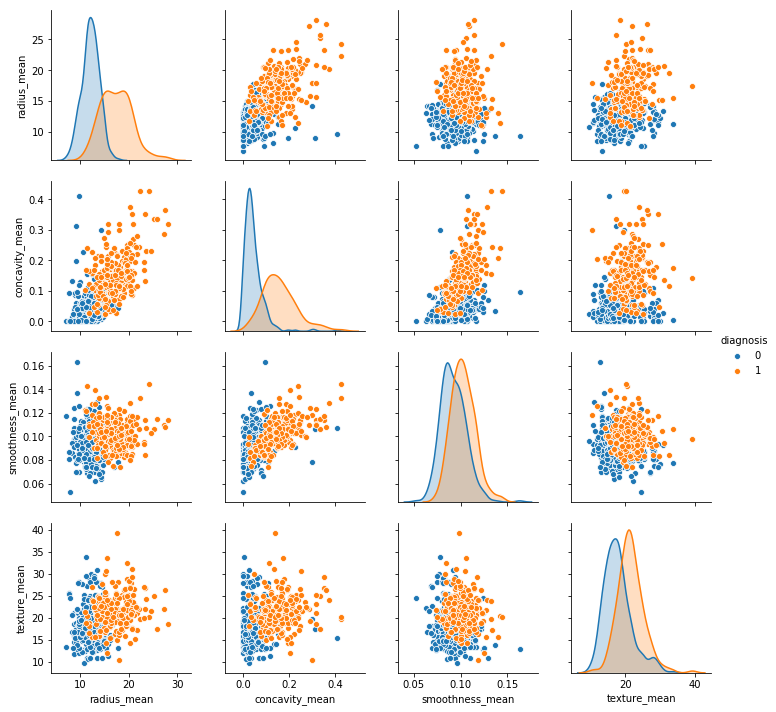

In [0]:
# Plotting bivariate relations between each pair of features (4 features x4 so 16 graphs) with hue = "diagnosis"

sns.pairplot(dataset, hue="diagnosis", vars = ["radius_mean", "concavity_mean", "smoothness_mean", "texture_mean"])
plt.show()

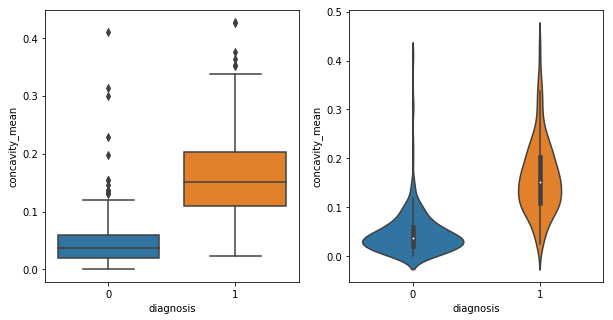

In [0]:
# Plotting correlation between diagnosis and concativity

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="concavity_mean", data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis", y="concavity_mean", data=dataset)
plt.show()

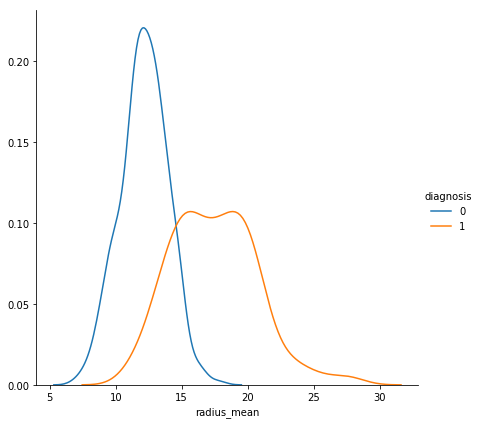

In [0]:
# Distribution density plot KDE (kernel density estimate)

sns.FacetGrid(dataset, hue="diagnosis", height=6).map(sns.kdeplot, "radius_mean").add_legend()
plt.show()

**Bar Plot :**  Here the frequency of the observation is plotted.In this case we are plotting the frequency of the target variable in the Dataset



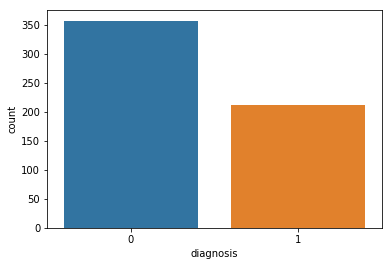

In [0]:
# Bar Plot

#f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('diagnosis',data=dataset)
#ax.set_title('Iris Species Count')
plt.show()

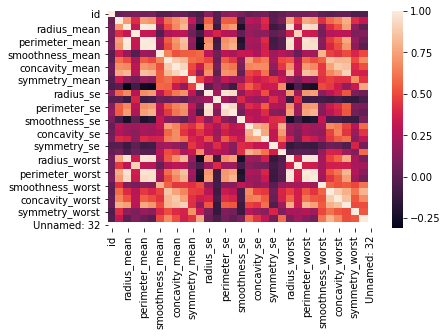

In [0]:
# Generating the correlation heatmap

corr = dataset.corr()
sns.heatmap(corr)

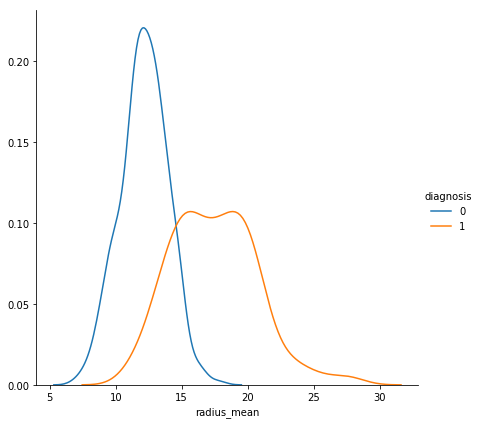

In [0]:
# Distribution density plot KDE (kernel density estimate)

sns.FacetGrid(dataset, hue="diagnosis", height=6).map(sns.kdeplot, "radius_mean").add_legend()
plt.show()

**Joint plot:** Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

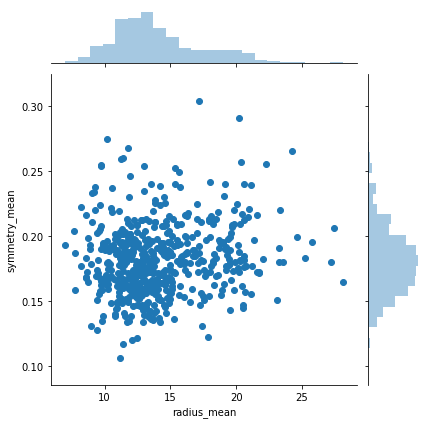

In [0]:
fig=sns.jointplot(x='radius_mean',y='symmetry_mean',data=dataset)

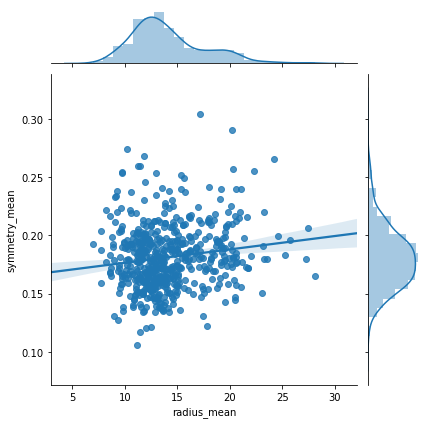

In [0]:
sns.jointplot("radius_mean", "symmetry_mean", data=dataset, kind="reg")

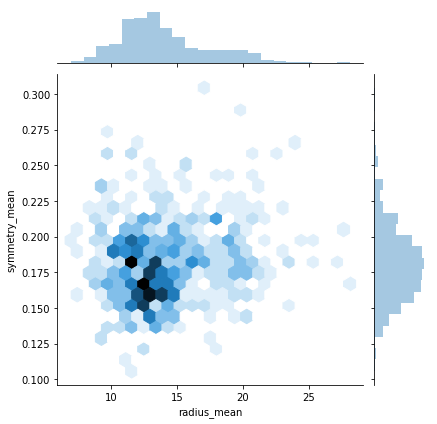

In [0]:
fig=sns.jointplot(x='radius_mean',y='symmetry_mean',kind='hex',data=dataset)

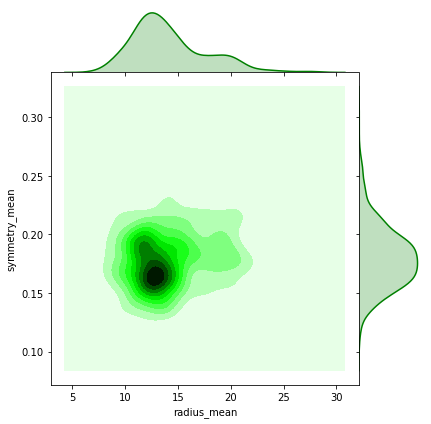

In [0]:
sns.jointplot("radius_mean", "symmetry_mean", data=dataset, kind="kde",space=0,color='g')

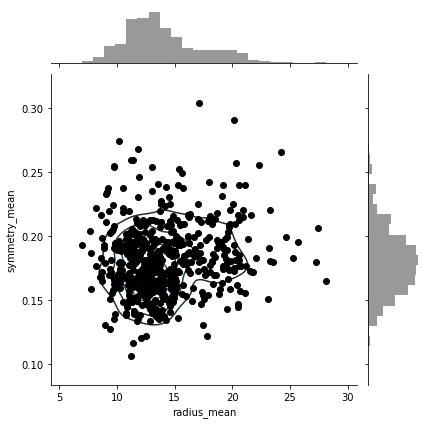

In [0]:
g = (sns.jointplot("radius_mean", "symmetry_mean",data=dataset, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

#### Pie Chart

####  FacetGrid Plot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


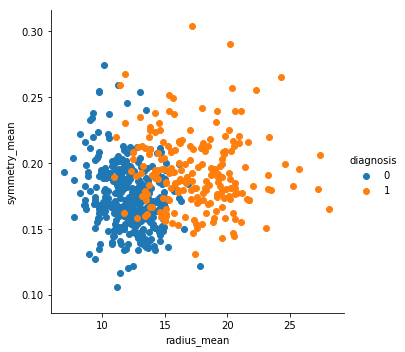

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.FacetGrid(dataset,hue='diagnosis',size=5)\
.map(plt.scatter,'radius_mean','symmetry_mean')\
.add_legend()

**Boxplot or Whisker plot**

Box plot was was first introduced in year 1969 by Mathematician John Tukey.Box plot give a statical summary of the features being plotted.Top line represent the max value,top edge of box is third Quartile, middle edge represents the median,bottom edge represents the first quartile value.The bottom most line respresent the minimum value of the feature.The height of the box is called as Interquartile range.The black dots on the plot represent the outlier values in the data.

In [0]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='PetalLengthCm',data=iris,order=['Iris-virginica','Iris-versicolor','Iris-setosa'],linewidth=2.5,orient='v',dodge=False)

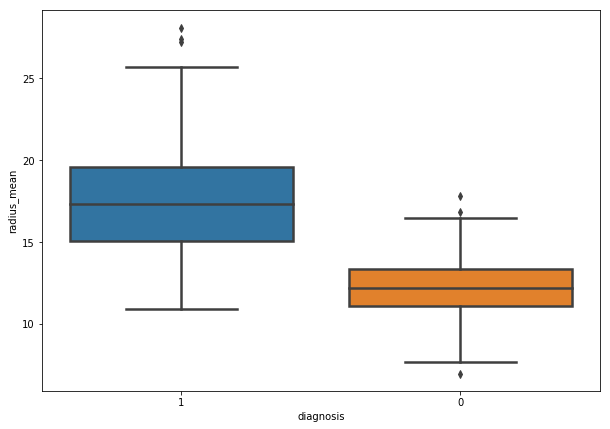

In [0]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='diagnosis',y='radius_mean',data=dataset,order=[1,0],linewidth=2.5,orient='v',dodge=False)

#### Strip plot

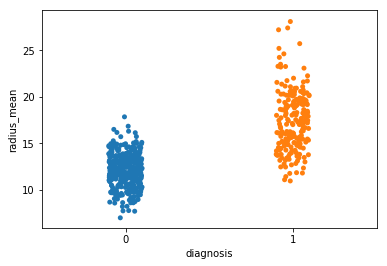

In [0]:
# Plotting the distribution of the mean radius
sns.stripplot(x="diagnosis", y="radius_mean", data=dataset, jitter=True, edgecolor="gray")
plt.show()

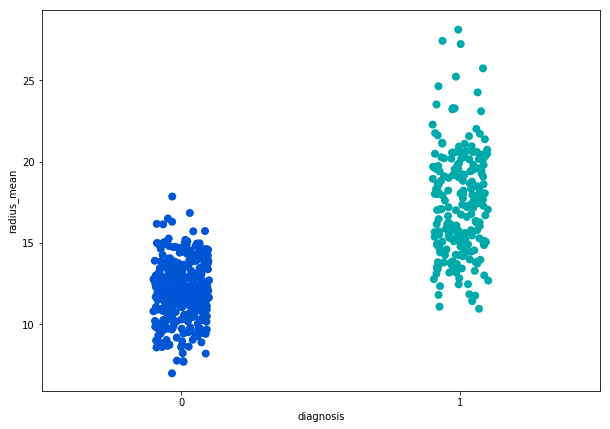

In [0]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.stripplot(x='diagnosis',y='radius_mean',data=dataset,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

#### Combining Box and Strip Plots

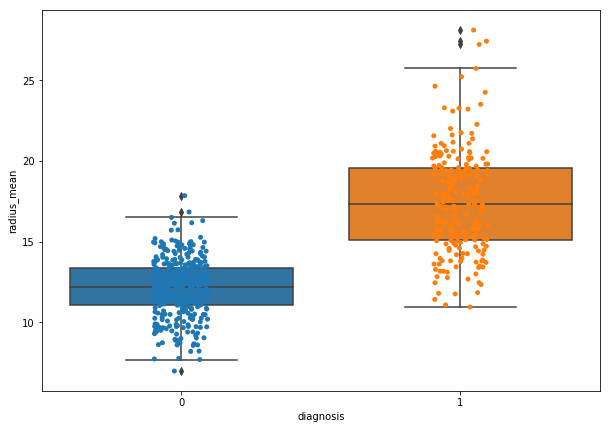

In [0]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='diagnosis',y='radius_mean',data=dataset)
fig=sns.stripplot(x='diagnosis',y='radius_mean',data=dataset,jitter=True,edgecolor='gray')

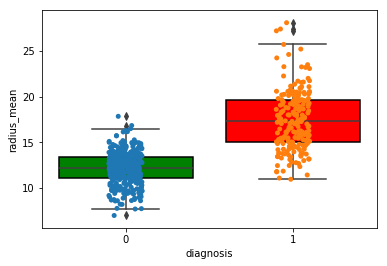

In [0]:
ax= sns.boxplot(x="diagnosis", y="radius_mean", data=dataset)
ax= sns.stripplot(x="diagnosis", y="radius_mean", data=dataset, jitter=True, edgecolor="gray")

boxtwo = ax.artists[1]
boxtwo.set_facecolor('yellow')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('red')
boxthree.set_edgecolor('black')
boxthree=ax.artists[0]
boxthree.set_facecolor('green')
boxthree.set_edgecolor('black')

plt.show()

#### Violin Plot

It is used to visualize the distribution of data and its probability distribution.This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution shape of the data. The thick black bar in the centre represents the interquartile range, the thin black line extended from it represents the 95% confidence intervals, and the white dot is the median.Box Plots are limited in their display of the data, as their visual simplicity tends to hide significant details about how values in the data are distributed

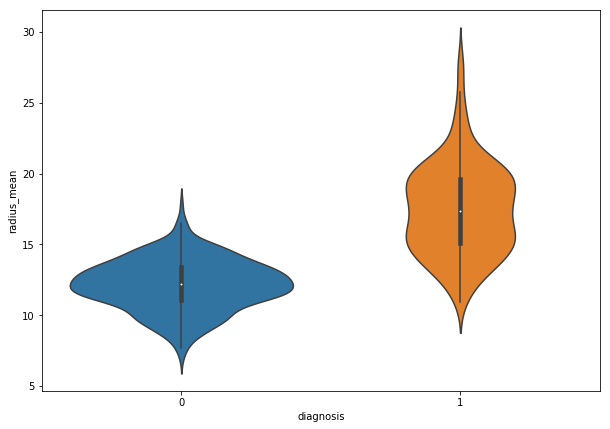

In [0]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.violinplot(x='diagnosis',y='radius_mean',data=dataset)

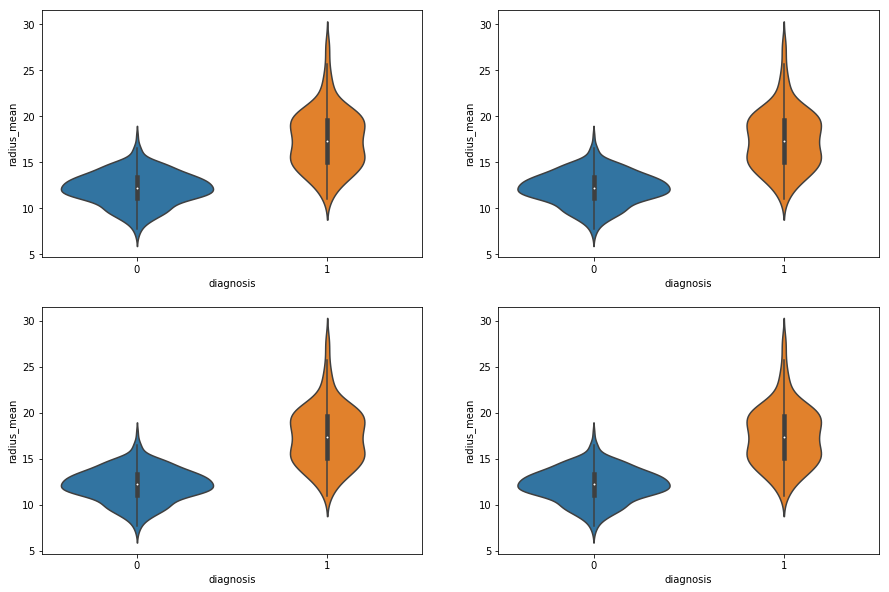

In [0]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='diagnosis',y='radius_mean',data=dataset)
plt.subplot(2,2,2)
sns.violinplot(x='diagnosis',y='radius_mean',data=dataset)
plt.subplot(2,2,3)
sns.violinplot(x='diagnosis',y='radius_mean',data=dataset)
plt.subplot(2,2,4)
sns.violinplot(x='diagnosis',y='radius_mean',data=dataset)

### Pair Plot:

A “pairs plot” is also known as a scatterplot, in which one variable in the same data row is matched with another variable's value, like this: Pairs plots are just elaborations on this, showing all variables paired with all the other variables.

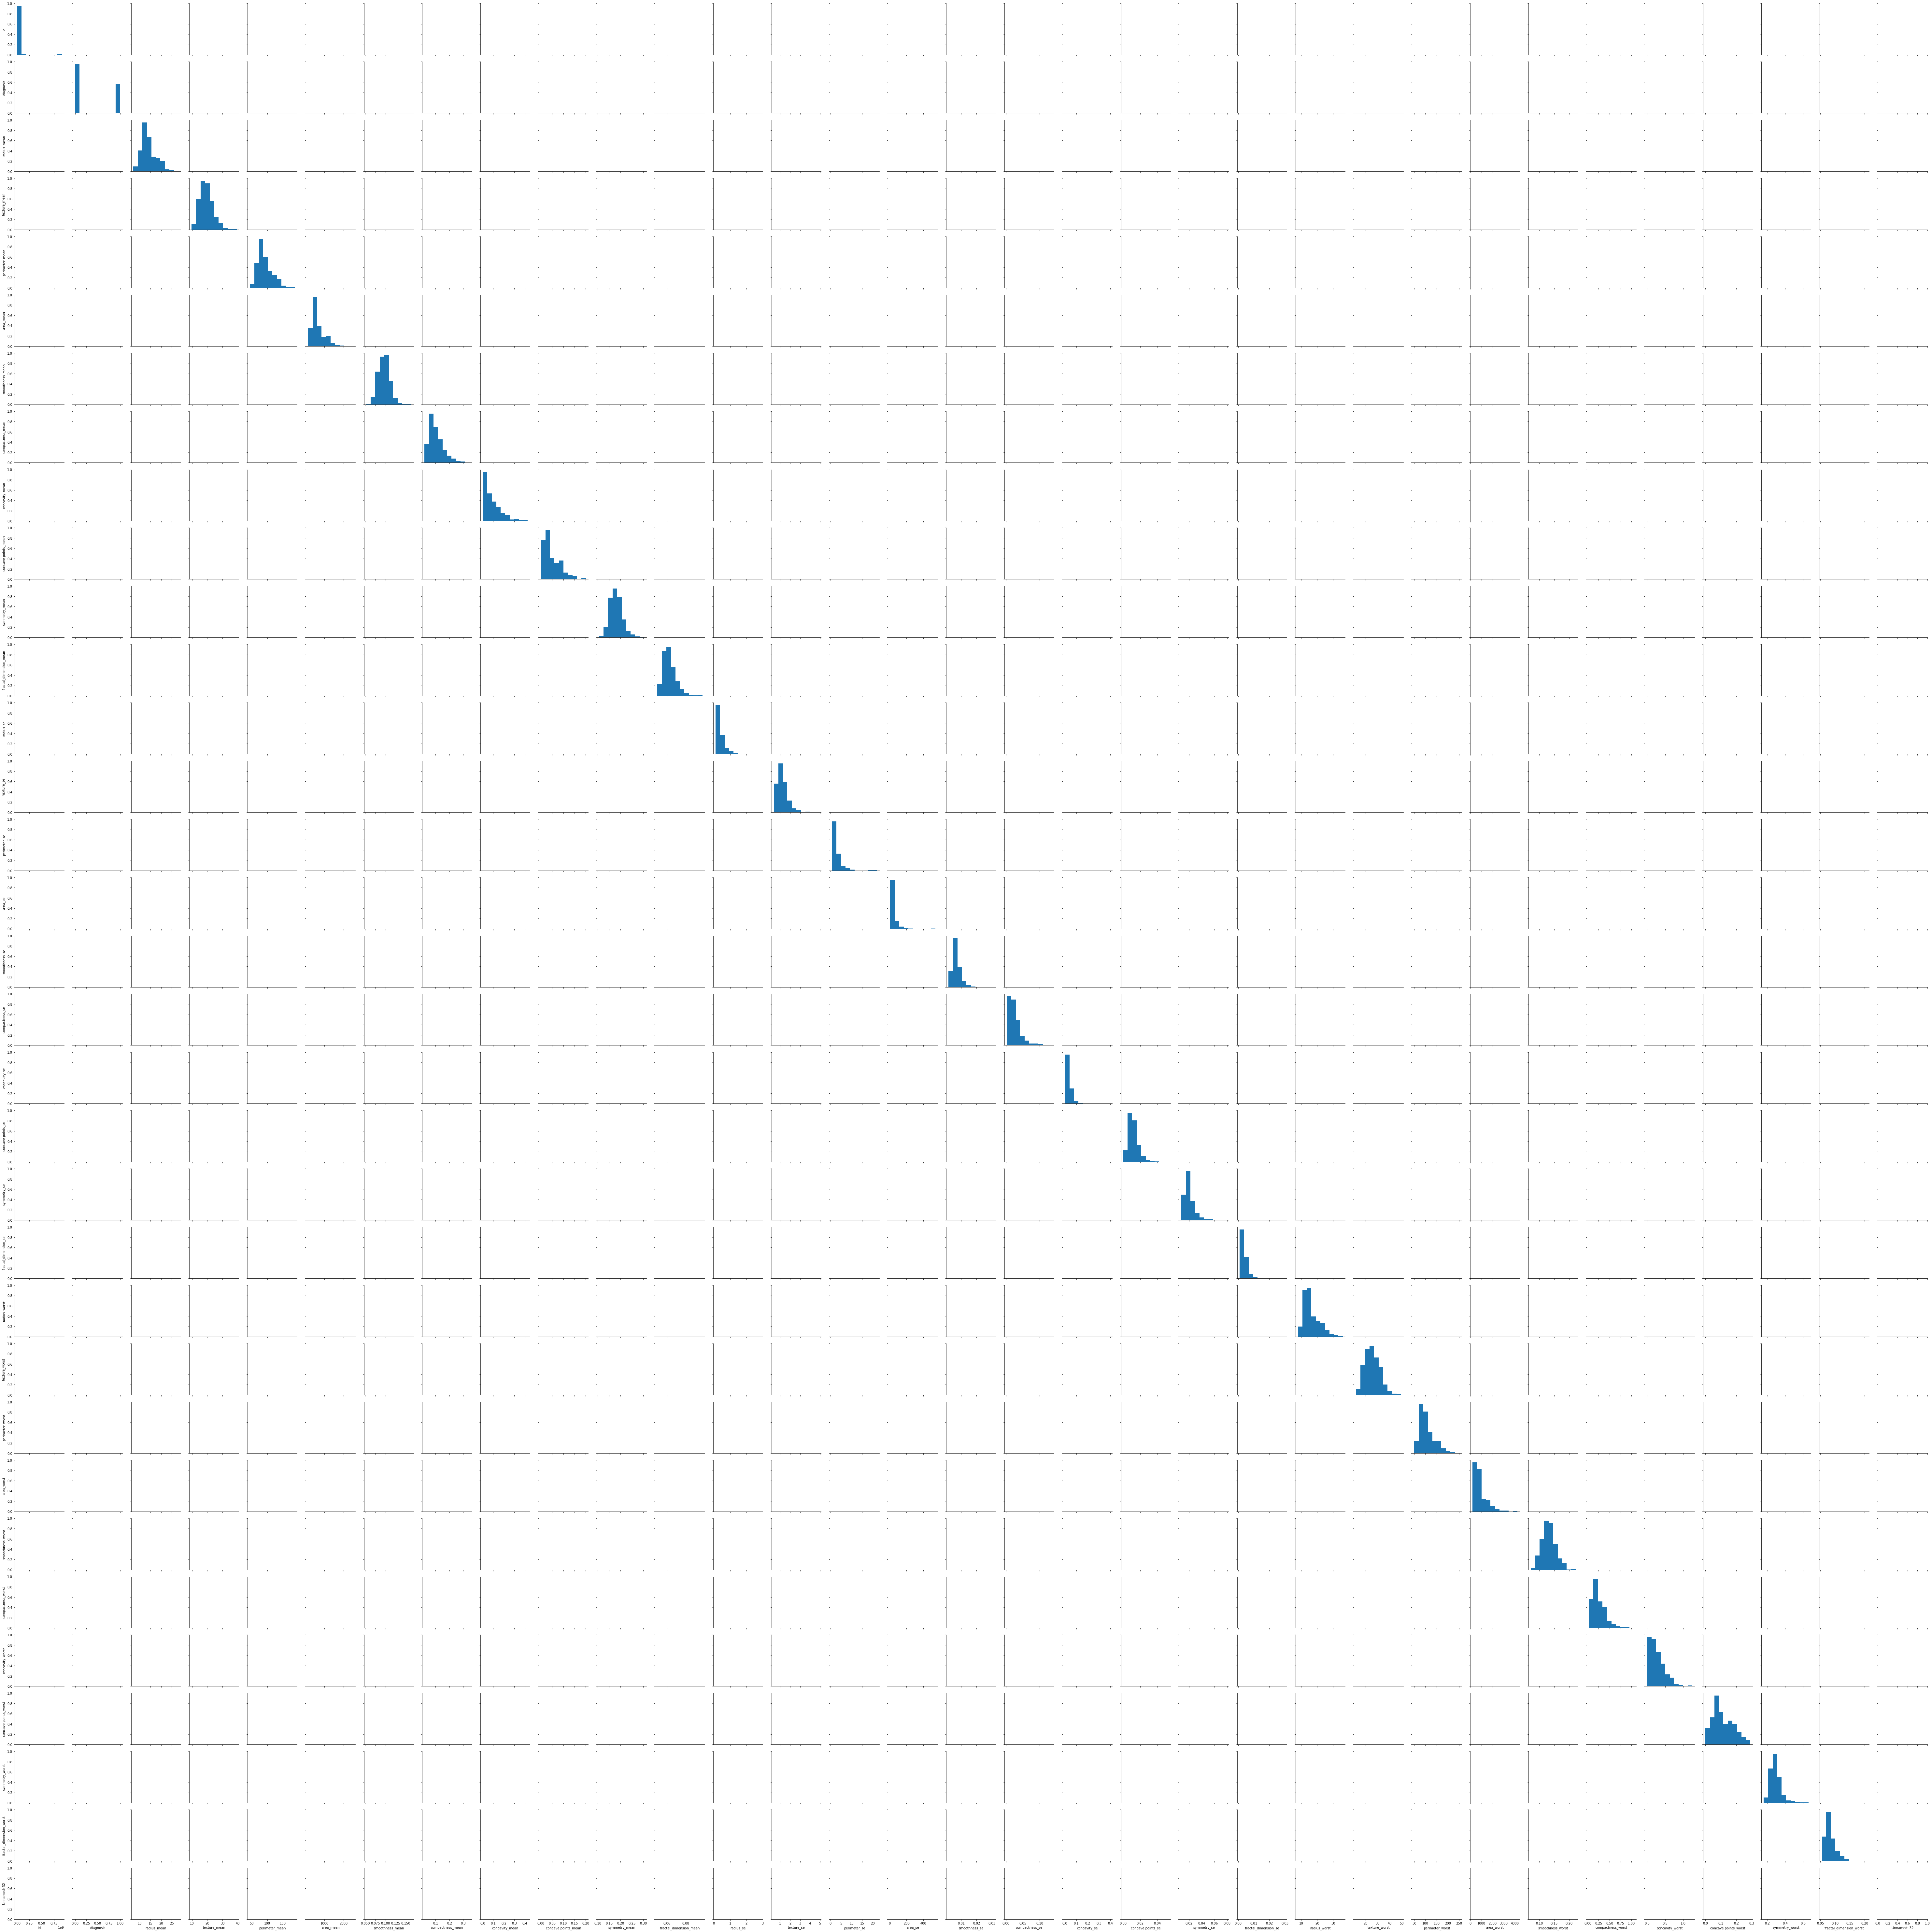

In [0]:
sns.pairplot(data=dataset,kind='scatter')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:110: RuntimeWarnin

ZeroDivisionError: ignored

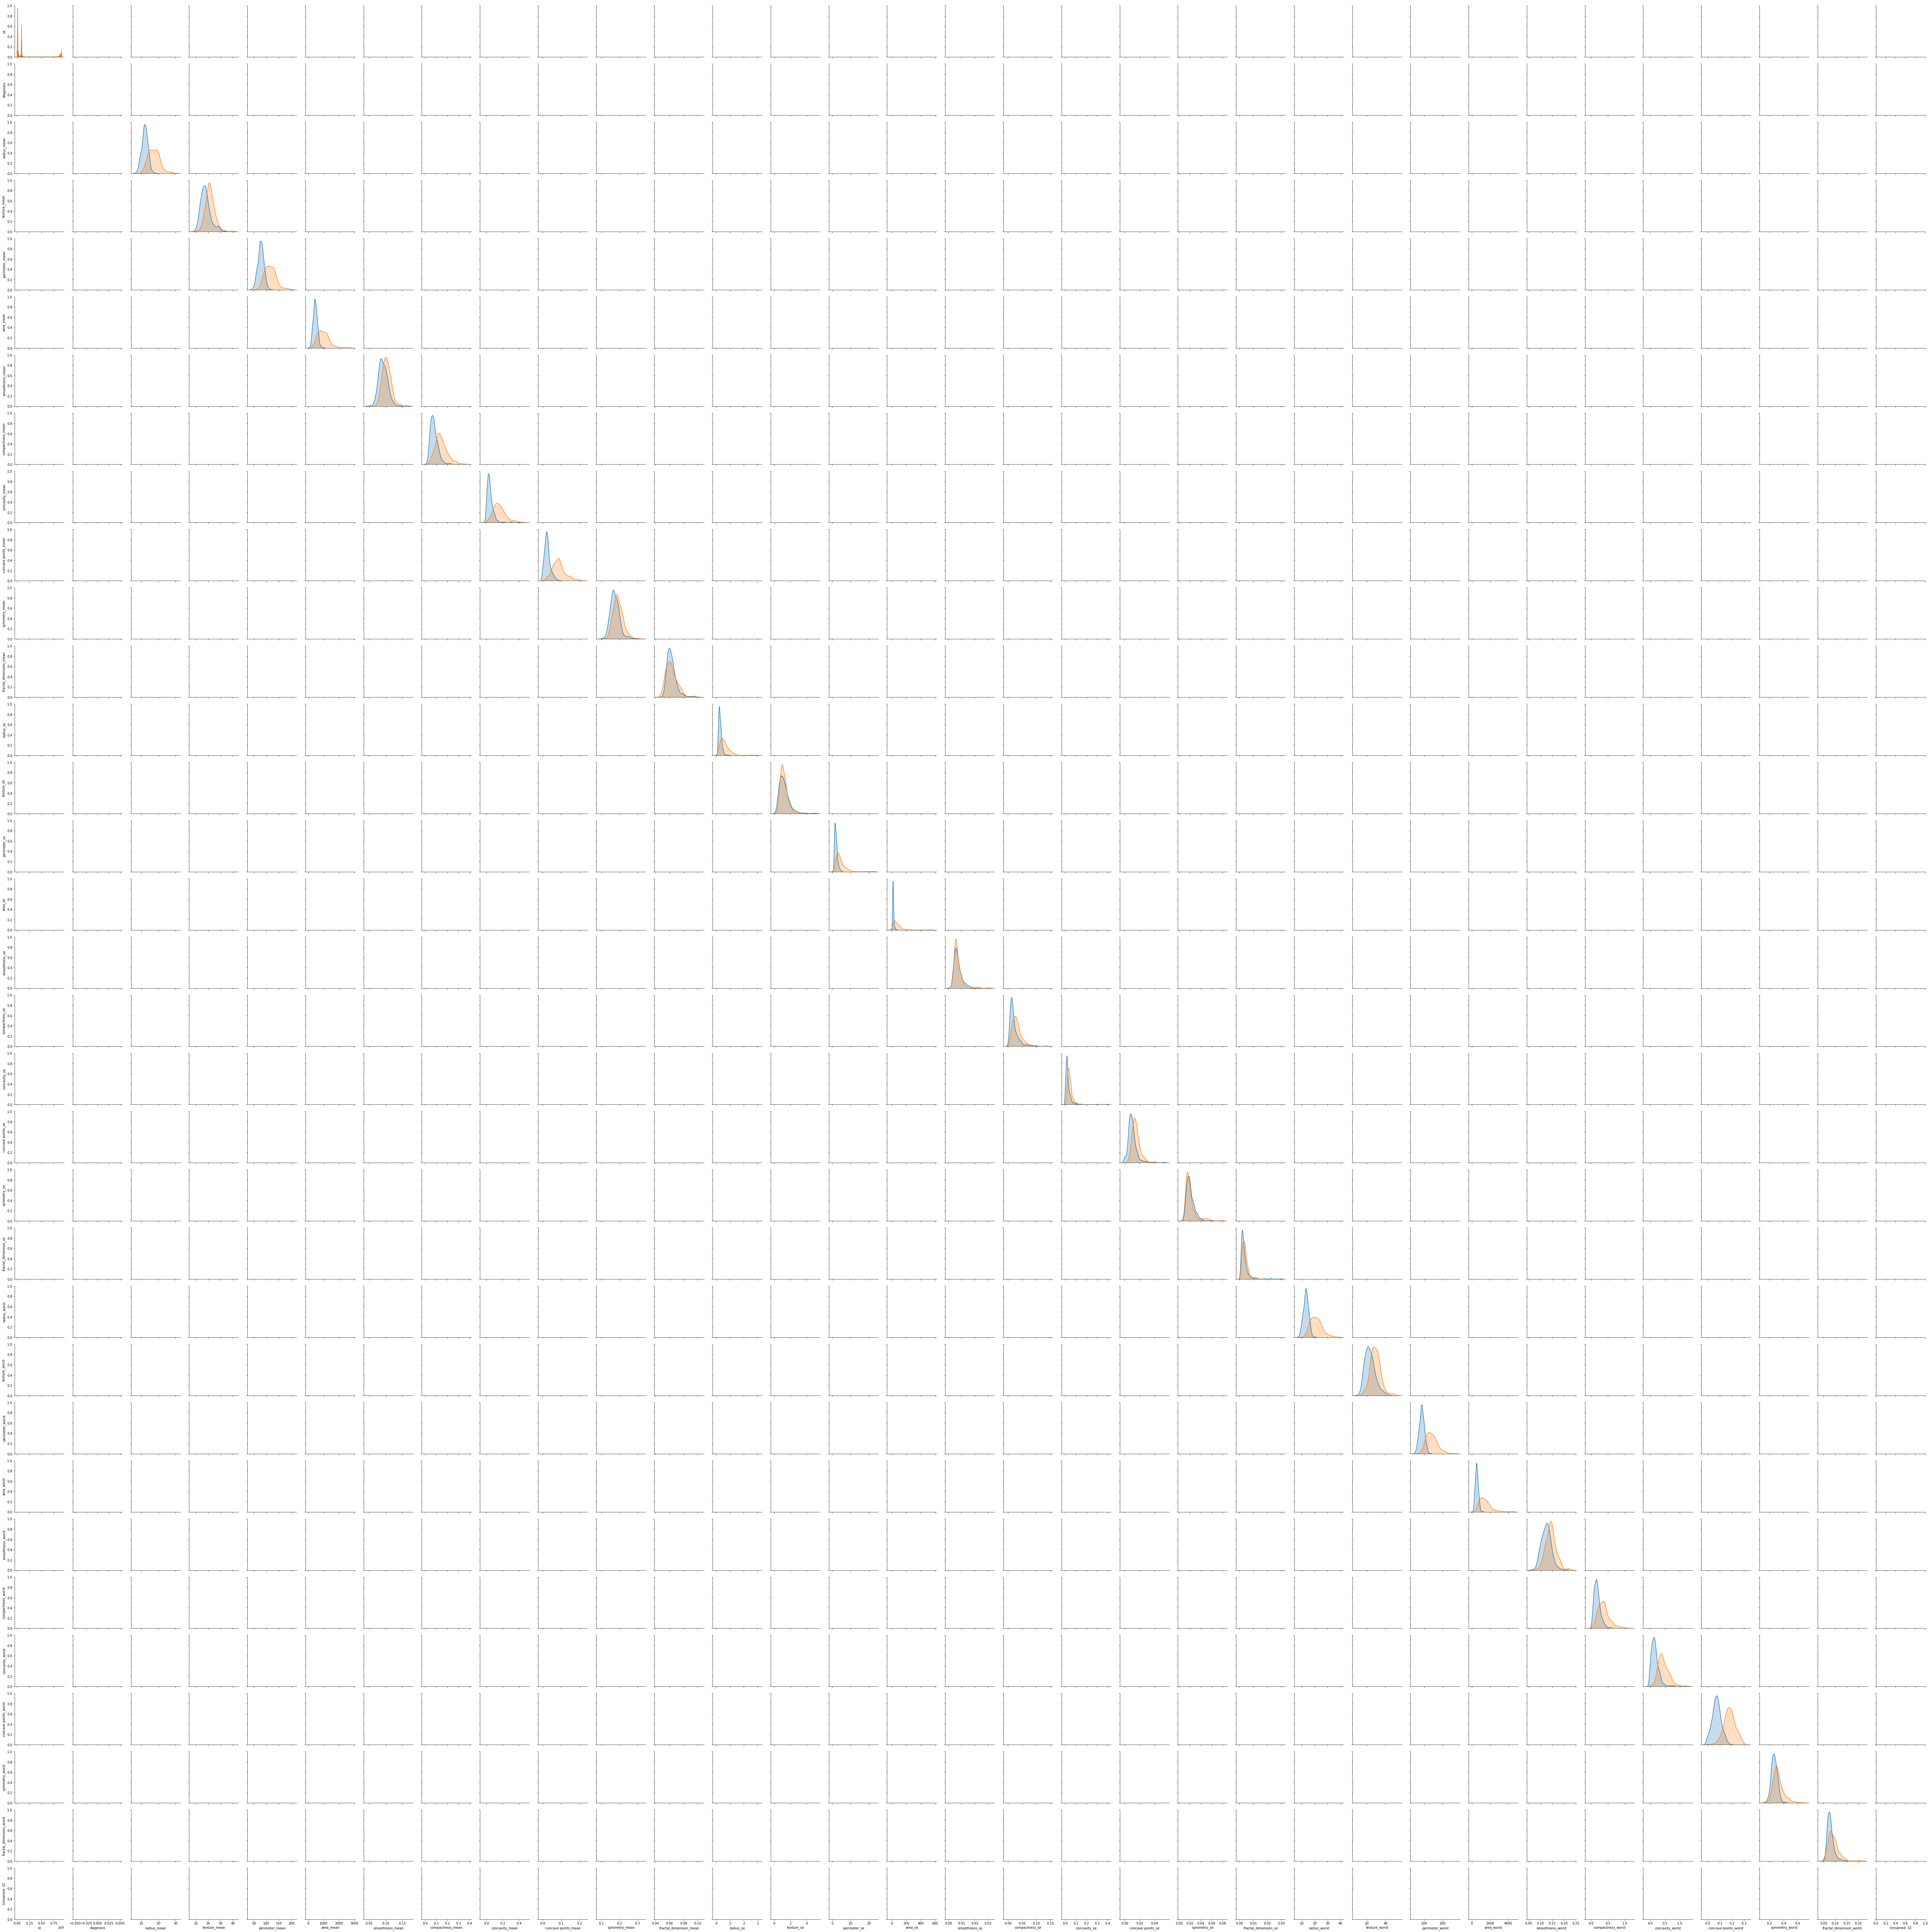

In [0]:
sns.pairplot(dataset,hue='diagnosis')

#### Heat Map 
Heat map is used to find out the correlation between different features in the dataset.High positive or negative value shows that the features have high correlation.This helps us to select the parmeters for machine learning.

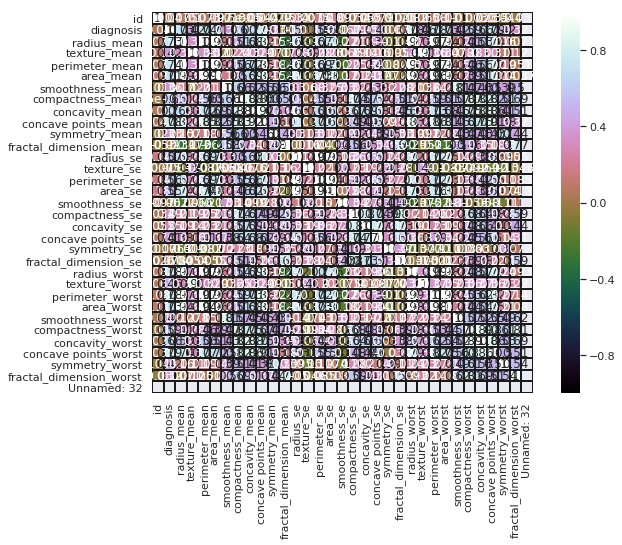

In [0]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

#### Distribution plot: 

The distribution plot is suitable for comparing range and distribution for groups of numerical data. Data is plotted as value points along an axis. You can choose to display only the value points to see the distribution of values, a bounding box to see the range of values, or a combination of both as shown here.The distribution plot is not relevant for detailed analysis of the data as it deals with a summary of the data distribution.

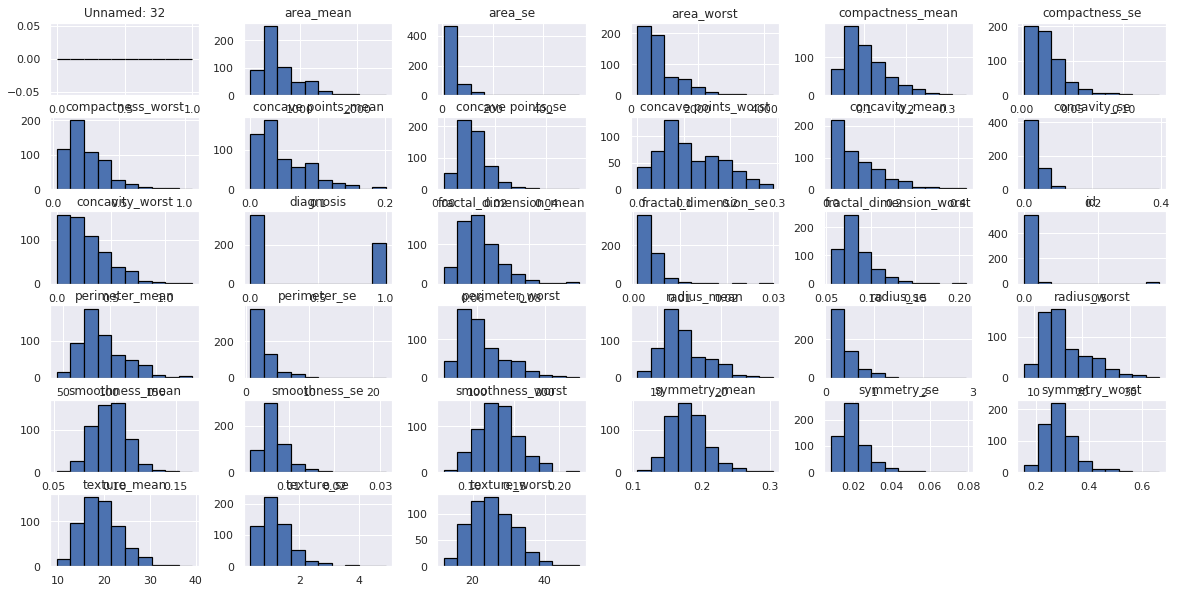

In [0]:
dataset.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,10)

#### Swarm plot
It looks a bit like a friendly swarm of bees buzzing about their hive. More importantly, each data point is clearly visible and no data are obscured by overplotting.A beeswarm plot improves upon the random jittering approach to move data points the minimum distance away from one another to avoid overlays. The result is a plot where you can see each distinct data point, like shown in below plot

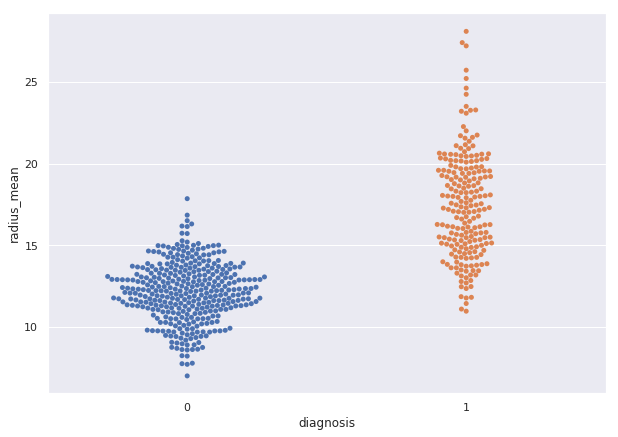

In [0]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig = sns.swarmplot(x="diagnosis", y="radius_mean", data=dataset)

#### Box and Swarm plot combined

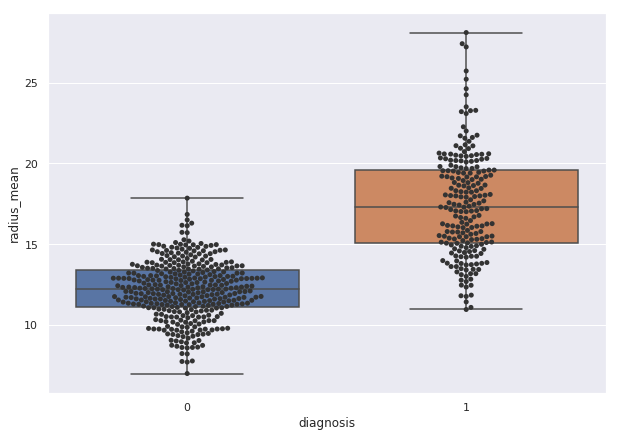

In [0]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig= sns.boxplot(x="diagnosis", y="radius_mean", data=dataset, whis=np.inf)
fig= sns.swarmplot(x="diagnosis", y="radius_mean", data=dataset, color=".2")

#### Swarm and Violin plot combined

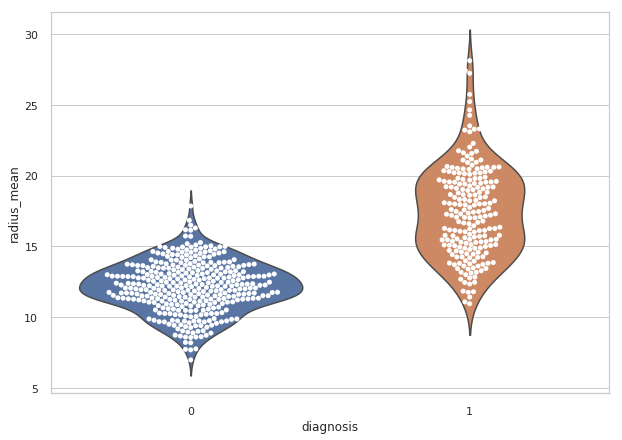

In [0]:
sns.set(style="whitegrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
ax = sns.violinplot(x="diagnosis", y="radius_mean", data=dataset, inner=None)
ax = sns.swarmplot(x="diagnosis", y="radius_mean", data=dataset,color="white", edgecolor="black")

#### Target(Diagnosis) based classification

In [0]:
sns.set(style="darkgrid")
sc=iris[dataset.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red',label='Setosa')
iris[dataset.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label='Versicolor',ax=sc)
iris[dataset.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='virginica', ax=sc)
sc.set_xlabel('Sepal Length in cm')
sc.set_ylabel('Sepal Width in cm')
sc.set_title('Sepal Length Vs Sepal Width')
sc=plt.gcf()
sc.set_size_inches(10,6)

#### LM PLot

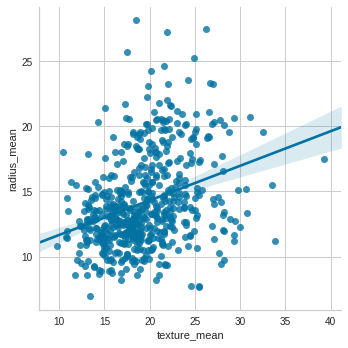

In [0]:
fig=sns.lmplot(x="texture_mean", y="radius_mean",data=dataset)

#### FacetGrid Plot 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


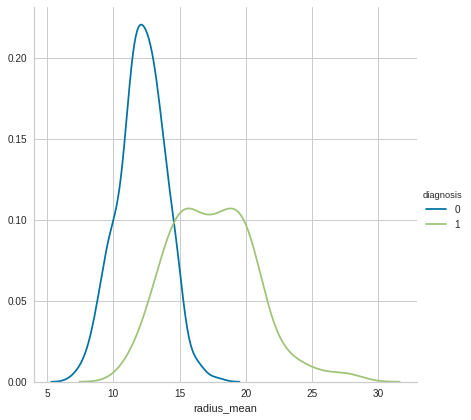

In [0]:
sns.FacetGrid(dataset, hue="diagnosis", size=6) \
   .map(sns.kdeplot, "radius_mean") \
   .add_legend()
plt.ioff() 

#### Andrews Curve:

In data visualization, an Andrews plot or Andrews curve is a way to visualize structure in high-dimensional data. It is basically a rolled-down, non-integer version of the Kent–Kiviat radar m chart, or a smoothened version of a parallel coordinate plot.In Pandas use Andrews Curves to plot and visualize data structure.Each multivariate observation is transformed into a curve and represents the coefficients of a Fourier series.This useful for detecting outliers in times series data.Use colormap to change the color of the curves

In [0]:
from pandas.tools.plotting import andrews_curves
andrews_curves(dataset,"diagnosis",colormap='rainbow')
plt.show()
plt.ioff()

#### Parallel coordinate plot:

This type of visualisation is used for plotting multivariate, numerical data. Parallel Coordinates Plots are ideal for comparing many variables together and seeing the relationships between them. For example, if you had to compare an array of products with the same attributes (comparing computer or cars specs across different models).

In [0]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(dataset, "diagnosis")

#### Radviz Plot RadViz Visualizer.

RadViz is a multivariate data visualization algorithm that plots each feature dimension uniformly around the circumference of a circle then plots points on the interior of the circle such that the point normalizes its values on the axes from the center to each arc. This mechanism allows as many dimensions as will easily fit on a circle, greatly expanding the dimensionality of the visualization

In [0]:
from yellowbrick.datasets import load_occupancy
from yellowbrick.features import RadViz

RadViz(dataset, "diagnosis")

RadialVisualizer(alpha=1.0,
                 ax=           id  diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302          1  ...                  0.11890          NaN
1      842517          1  ...                  0.08902          NaN
2    84300903          1  ...                  0.08758          NaN
3    84348301          1  ...                  0.17300          NaN
4    84358402          1  ...                  0.07678          NaN
5      843786          1  ...                  0.12440          NaN
6      844359          1  ...                  0.08368          NaN
7    84458202          1  ...                  0.11510          NaN
8      844981          1  ...                  0.10720          NaN
9    84501001          1  ...                  0.20750          NaN
10     845636          1  ...                  0.08452          NaN
11   84610002          1  ...                  0.10480          NaN
12     84622...
556    924964          0  ...                  0.067

#### Factor Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


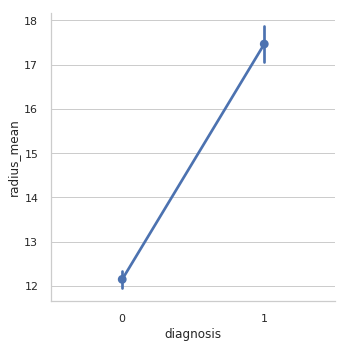

In [0]:
#f,ax=plt.subplots(1,2,figsize=(18,8))
sns.factorplot('diagnosis','radius_mean',data=dataset)
plt.ioff()
plt.show()

#### Boxen Plot

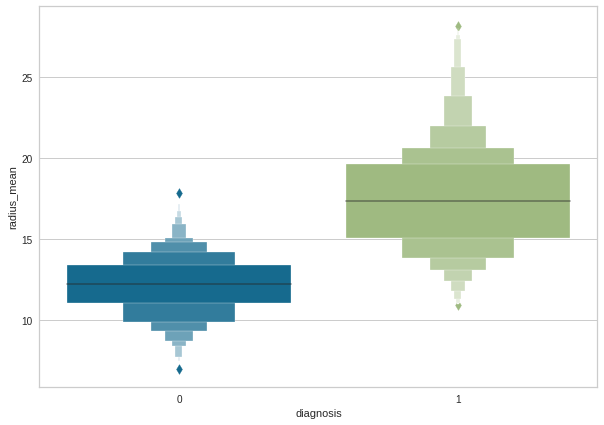

In [0]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxenplot(x='diagnosis',y='radius_mean',data=dataset)

#### Residual Plot :

The most useful way to plot the residuals, though, is with your predicted values on the x-axis, and your residuals on the y-axis. The distance from the line at 0 is how bad the prediction was for that value.

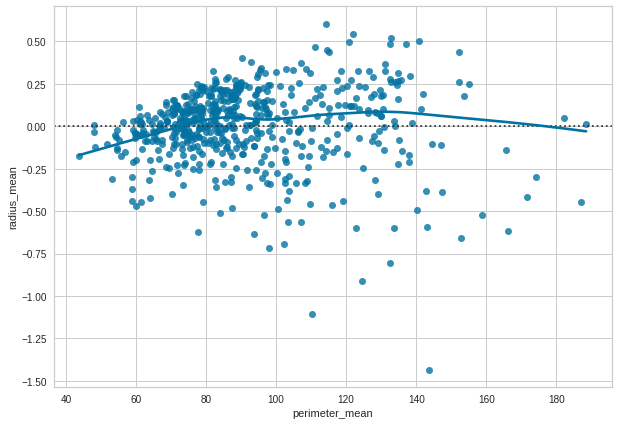

In [0]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.residplot('perimeter_mean', 'radius_mean',data=dataset,lowess=True)

#### Venn Diagram :

A Venn diagram (also called primary diagram, set diagram or logic diagram) is a diagram that shows all possible logical relations between a finite collection of different sets. Each set is represented by a circle. The circle size represents the importance of the group. The groups are usually overlapping: the size of the overlap represents the intersection between both groups.

In [0]:
# venn2
from matplotlib_venn import venn2
sepal_length = dataset.iloc[:,0]
sepal_width = dataset.iloc[:,1]
petal_length = dataset.iloc[:,2]
petal_width = dataset.iloc[:,3]
# First way to call the 2 group Venn diagram
venn2(subsets = (len(radius_mean)-15, len(texture_mean)-15, 15), set_labels = ('radius_mean', 'texture_mean'))
plt.show()

NameError: ignored

In [0]:
# donut plot
feature_names = "radius_mean","texture_mean","radius_mean","texture_mean"
feature_size = [len(radius_mean),len(texture_mean),len(radius_mean),len(radius_mean)]
# create a circle for the center of plot
circle = plt.Circle((0,0),0.2,color = "white")
plt.pie(feature_size, labels = feature_names, colors = ["red","green","blue","cyan"] )
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Number of Each Features")
plt.show()

NameError: ignored

In [0]:
dataset.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


#### KDE Plot

Fit and plot a univariate or bivariate kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0, 0.5, 'Mean of the Perimeter')

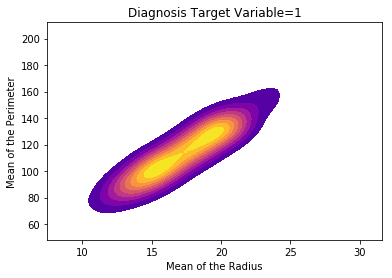

In [0]:
# Create a kde plot of radius mean versus perimeter mean for Target Variable: Diagnosis==1 of the Dataset

sub=dataset[dataset['diagnosis']==1]
sns.kdeplot(data=sub[['radius_mean','perimeter_mean']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Diagnosis Target Variable=1')
plt.xlabel('Mean of the Radius')
plt.ylabel('Mean of the Perimeter')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0, 0.5, 'Mean of the Perimeter')

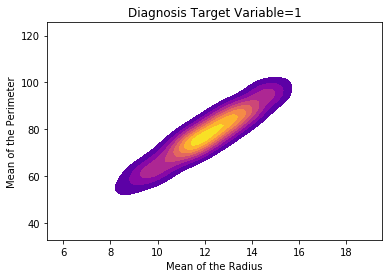

In [0]:
# Create a kde plot of radius mean versus perimeter mean for Target Variable: Diagnosis==0 of the Dataset.

sub=dataset[dataset['diagnosis']==0]
sns.kdeplot(data=sub[['radius_mean','perimeter_mean']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Diagnosis Target Variable=1')
plt.xlabel('Mean of the Radius')
plt.ylabel('Mean of the Perimeter')

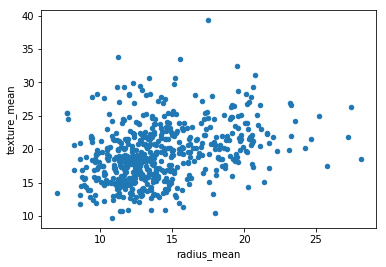

In [0]:
# We'll use this to make a scatterplot of the Dataset features.
dataset.plot(kind="scatter", x="radius_mean", y="texture_mean")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


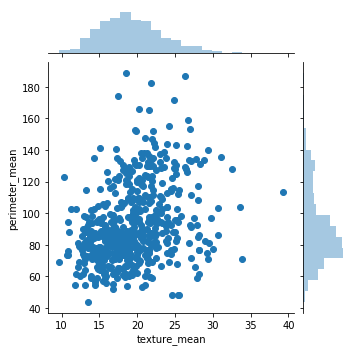

In [0]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="texture_mean", y="perimeter_mean", data=dataset, size=5)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


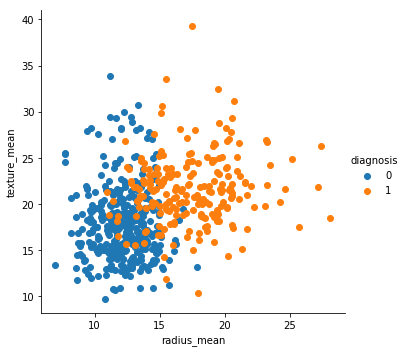

In [0]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(dataset, hue="diagnosis", size=5) \
   .map(plt.scatter, "radius_mean", "texture_mean") \
   .add_legend()

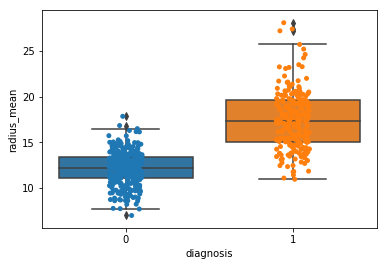

In [0]:
# Combined Boxplot and Strip Plot

ax = sns.boxplot(x="diagnosis", y="radius_mean", data=dataset)
bx = sns.stripplot(x="diagnosis", y="radius_mean", data=dataset, jitter=True, edgecolor="gray")

In [0]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='texture_mean',y='radius_mean',data=dataset,hue='lunch',palette='coolwarm')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=dataset,hue='lunch',palette='coolwarm')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='lunch',palette='coolwarm')
plt.title('WRITING SCORES')
plt.show()

In [0]:
dataset.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
